In [28]:
import requests, pandas as pd, numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [15]:
household_type = pd.read_excel("raw_data.xlsx",sheet_name="T1",header=10,nrows=9)
household_occupier_type = pd.read_excel("raw_data.xlsx",sheet_name="T2",header=10,nrows=30)
household_size = pd.read_excel("raw_data.xlsx",sheet_name="T3",header=9,nrows=16)
household_type_tenancy = pd.read_excel("raw_data.xlsx",sheet_name="T4",header=9,nrows=12)
household_child = pd.read_excel("raw_data.xlsx",sheet_name="T5",header=10,nrows=14)

In [31]:
household_type = household_type.drop(axis=0,index=[0,1])
household_type

,Data Series,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1980
2,HDB 1- And 2-Room Flats,94200,92400,88800,85700,81400,75400,74100,68800,64000,...,55600,53900,58100,64400,69100,87200,99900,106900,100900,103500
3,HDB 3-Room Flats,241400,242800,242400,240000,233900,229100,230300,223400,220100,...,257300,233900,264400,244300,228400,224800,228700,206600,190000,152300
4,HDB 4-Room Flats,438800,437700,434300,436500,420800,409900,407400,392300,386000,...,188300,181500,161800,159900,145800,119200,81200,61400,53200,46300
5,HDB 5-Room And Executive Flats,315600,316200,314600,317000,307200,302900,298600,295800,292800,...,88700,86100,69900,65900,59000,48200,34300,32900,28400,16500
6,Condominiums And Other Apartments,237500,229100,220100,222000,210300,201700,182400,170800,161800,...,30800,30800,24500,25500,21500,18700,15000,15800,14300,18400
7,Landed Properties,68200,68500,68400,69000,67900,66500,66200,69200,69400,...,49800,46300,44800,38400,34300,40500,44000,44500,41500,40100
8,Other Types Of Dwelling,3900,3900,3900,2200,3800,3100,3500,4200,3600,...,12500,22200,18800,17900,29100,36400,44400,53700,70600,93700


In [51]:
selected_household_type = household_type.drop(columns="1980")
selected_household_type = selected_household_type.melt(id_vars=["Data Series"],
            value_vars=[str(i) for i in range(1983,2023)])
selected_household_type = selected_household_type.rename(columns={"Data Series":"Type of Household",
                                                                  "variable":"year", "value":"noHouseholds"})

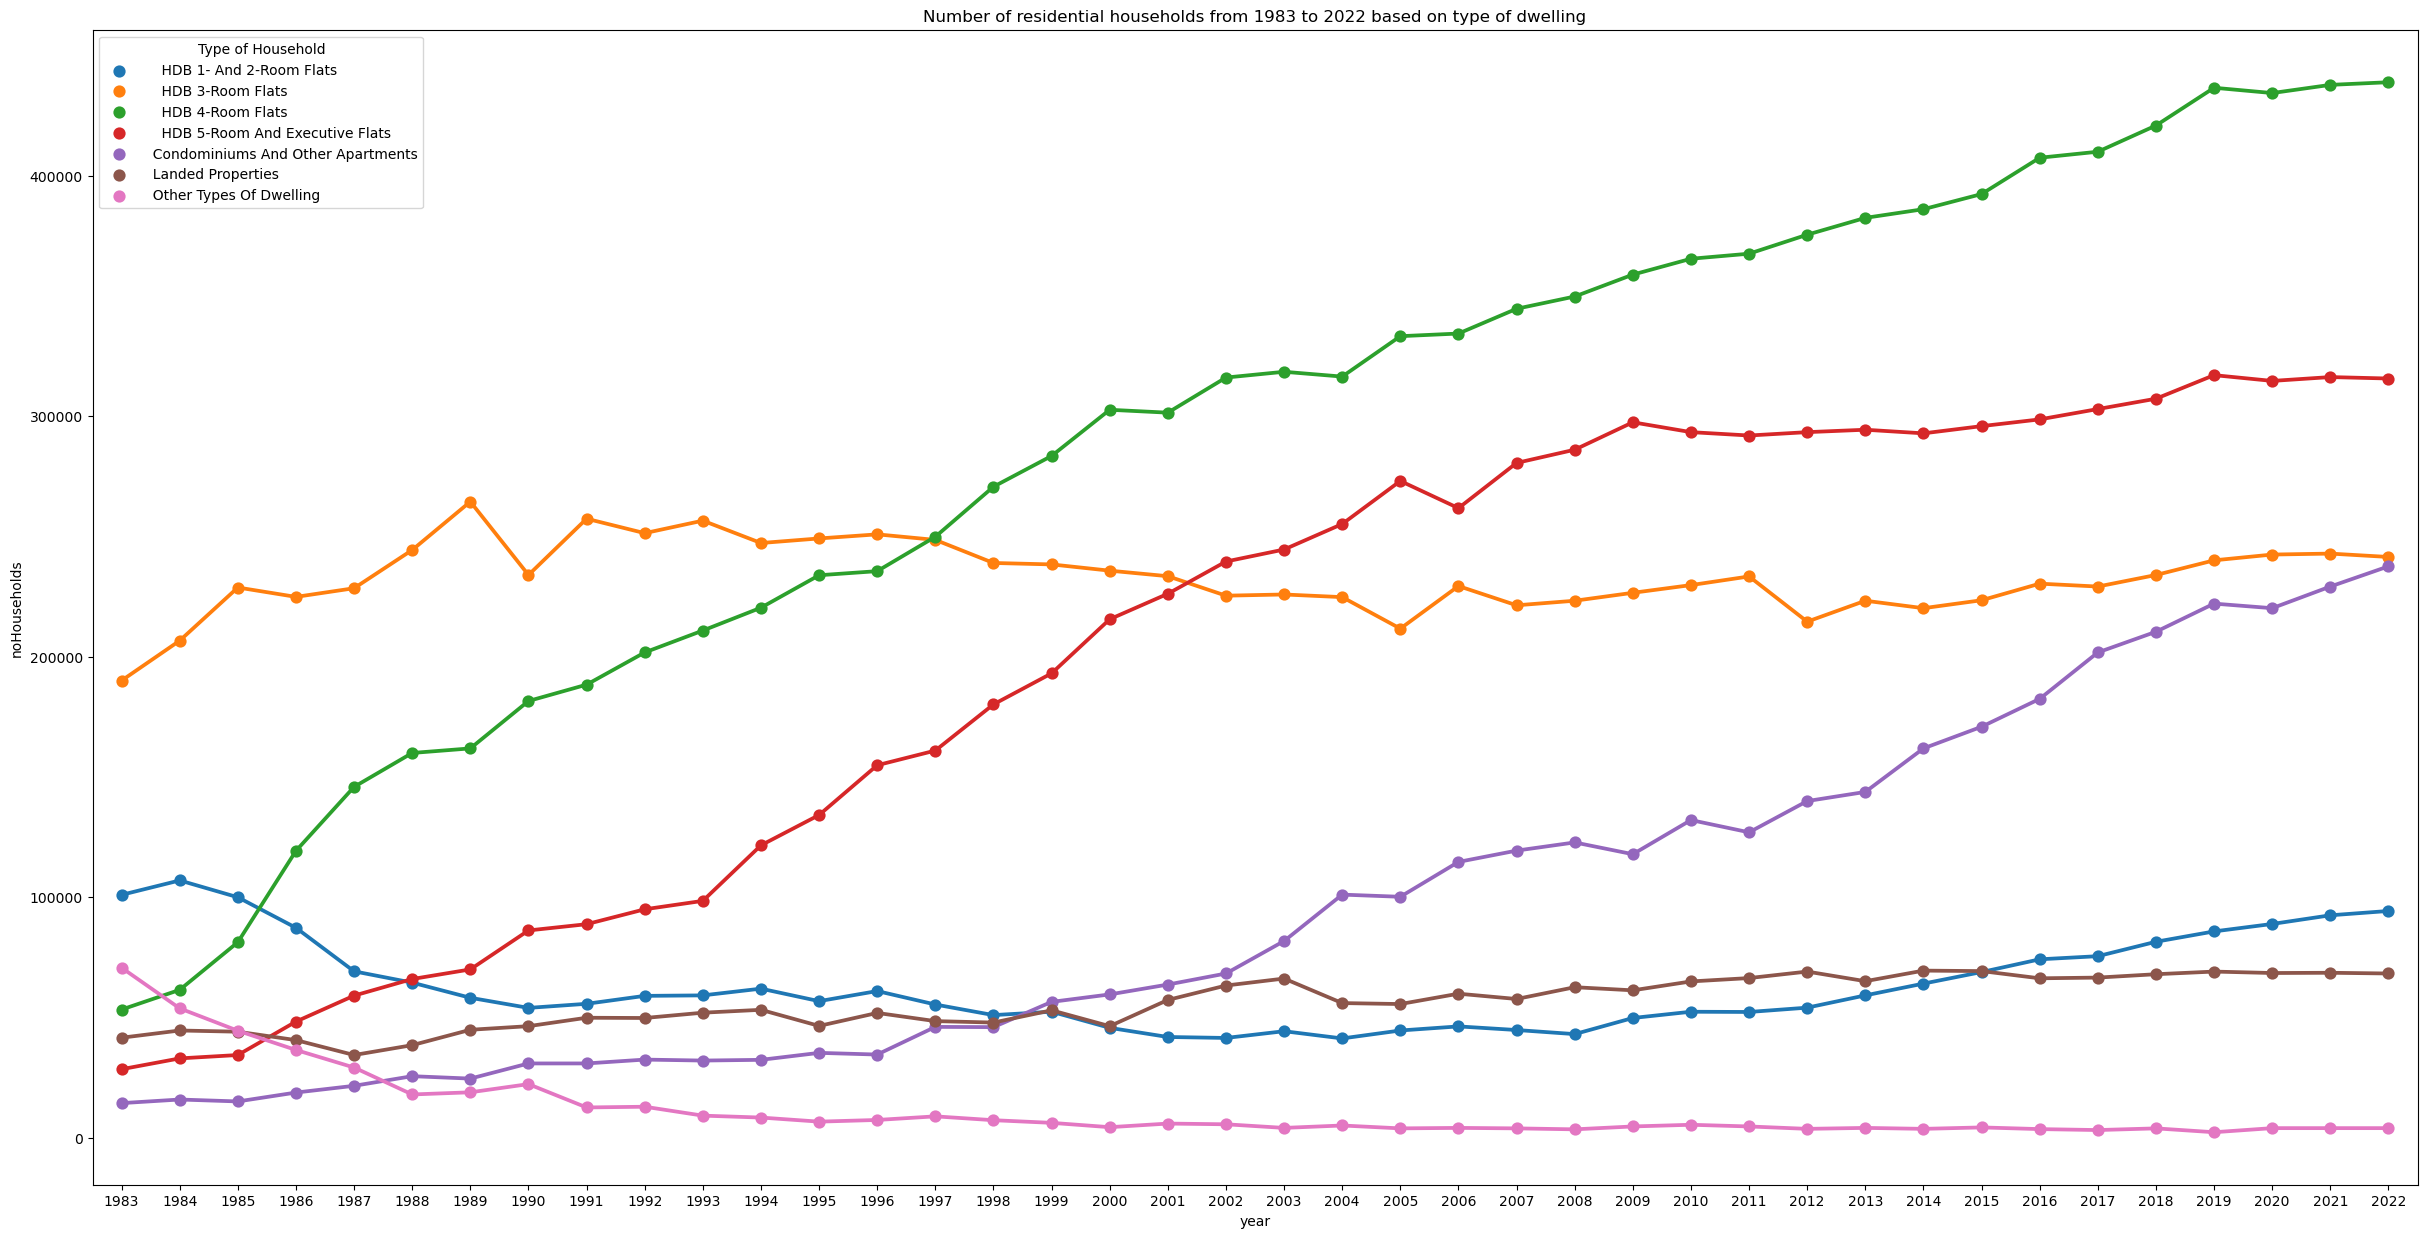

In [56]:
plt.figure(figsize=(30,15))
plt.title("Number of residential households from 1983 to 2022 based on type of dwelling")
sns.pointplot(y=selected_household_type["noHouseholds"],x=selected_household_type["year"],data=selected_household_type,hue="Type of Household")
plt.show()

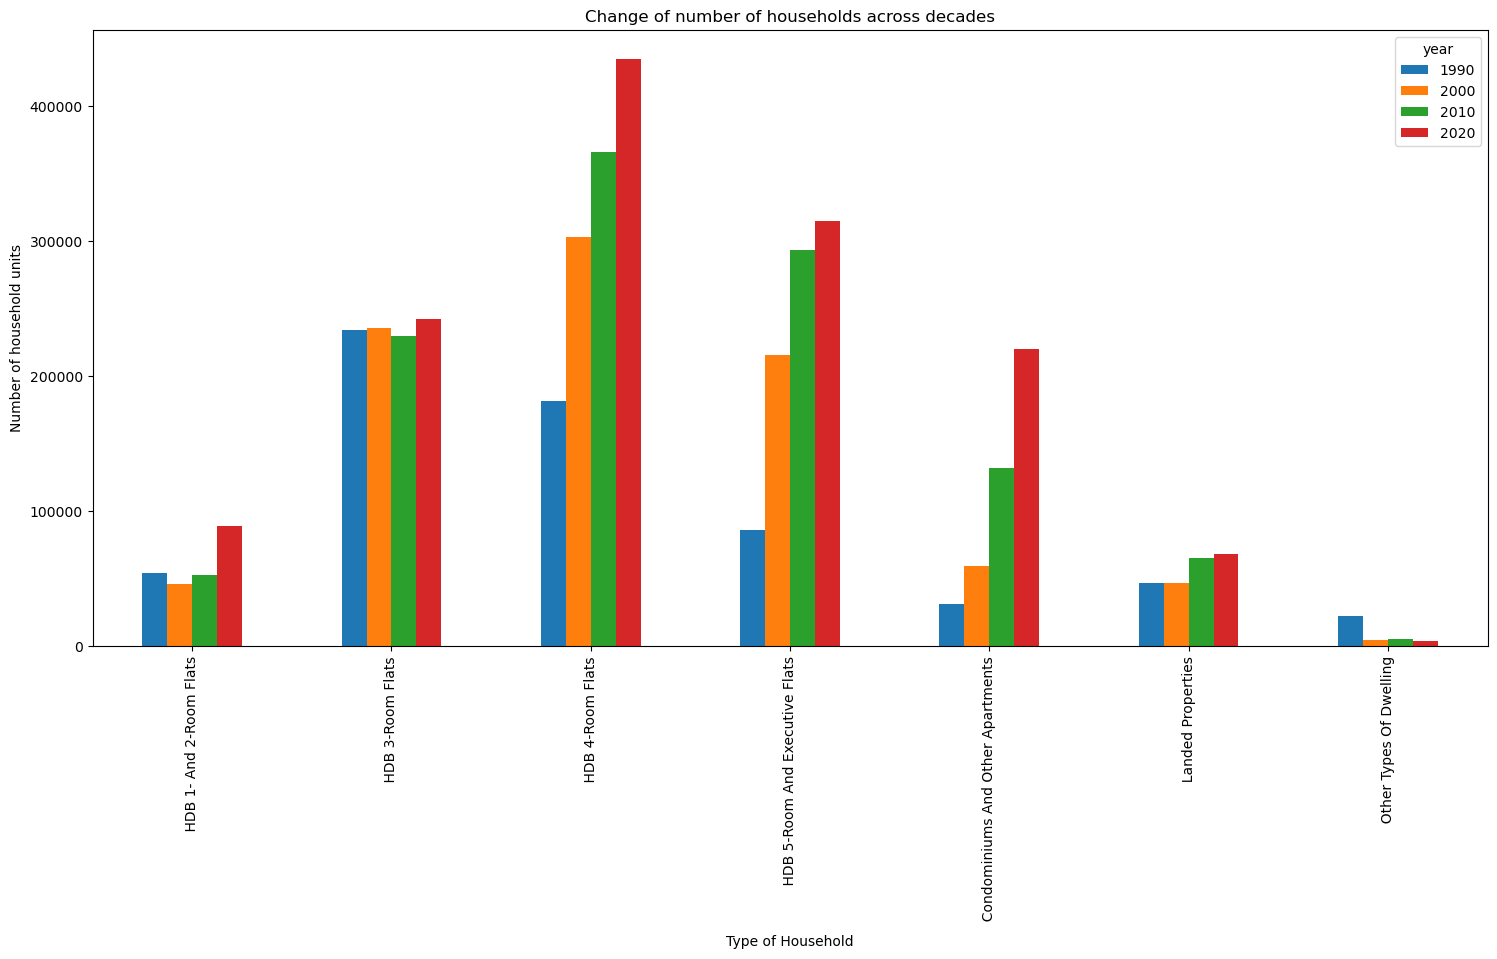

In [71]:
selected_household_type_decade = selected_household_type[selected_household_type["year"].astype(int)%10==0]
pd.pivot_table(selected_household_type_decade,values="noHouseholds",index="Type of Household",columns="year").plot(kind="bar",figsize=(18,8))
plt.title("Change of number of households across decades")
plt.ylabel("Number of household units")
plt.show()

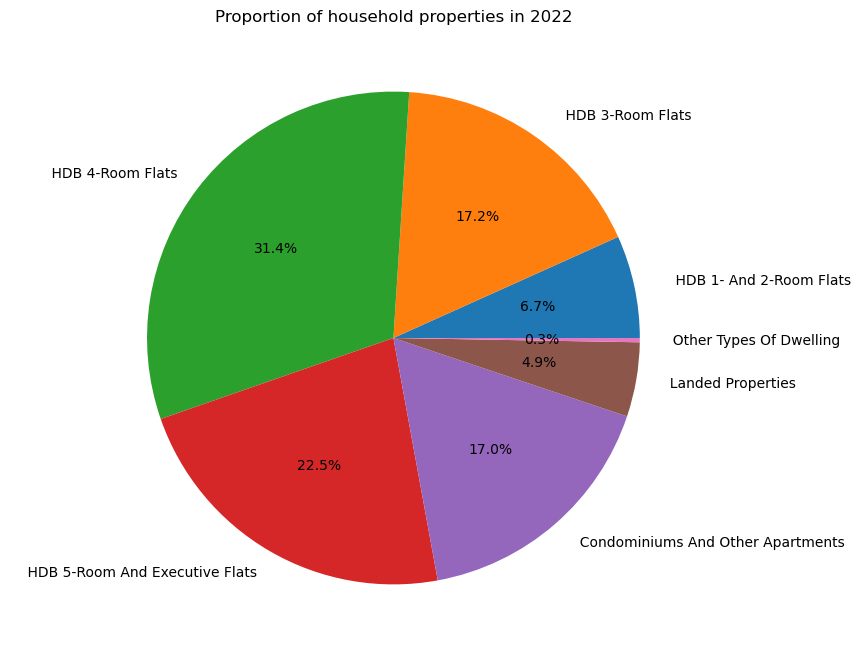

In [34]:
year = str(2022)
labels = household_type['Data Series']
sizes = household_type[year]

plt.figure(figsize=(15,8))
plt.title("Proportion of household properties in "+year)
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

In [72]:
household_occupier_type

,Data Series,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2007,2006,2005,2004,2003,2002,2001,2000,1995,1990
0,Resident Households,1399600,1390600,1372600,1372400,1325300,1289900,1263600,1225300,1200000,...,1074800,1054100,1024500,1003800,989000,964600,934400,915100,768400,661700
1,Married Couple-Based With Children,638700,643600,655000,643200,663100,664200,663000,665700,659800,...,621800,611800,604100,598300,588300,591000,582900,569500,518800,439800
2,Married Couple-Based Without Children,248500,247000,228400,261500,229300,219800,209900,188100,189300,...,152100,150500,135800,138800,138700,128500,119000,109800,68400,55300
3,Lone Parent,82400,85300,89800,91100,96100,90500,92800,94000,87400,...,75300,79000,70100,69600,63600,70000,70900,66300,61800,57100
4,Living Alone,217300,217400,220300,208000,185400,167900,156200,146000,134800,...,116400,112500,103300,96300,94800,82700,73200,75400,38100,34600
5,Others,212600,197400,179100,168600,151500,147600,141700,131600,128700,...,109100,100200,111200,100800,103500,92400,88300,94100,81200,75000
6,Household Reference Persons Aged Below 35 Years,145200,133600,130400,123300,113500,113700,109500,99000,97500,...,127900,122500,138300,131300,136200,130600,140300,140000,122900,150200
7,Married Couple-Based With Children,45800,43600,42800,43700,43800,48500,46300,44300,42600,...,52100,48700,54800,54400,55200,58100,65500,66800,70500,84400
8,Married Couple-Based Without Children,31700,33100,33100,36300,34500,30400,34300,28000,28300,...,38000,36900,42000,41000,43700,39800,40300,40900,26600,29200
9,Lone Parent,3500,3100,3100,2900,2700,2900,2400,2900,2500,...,2900,3100,3100,2300,2400,2600,3800,2700,2800,3200


In [5]:
elect_tariff_annual

,Data Series,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Low Tension Supplies - Domestic (Cents Per Kil...,28.32,22.70,22.07,23.57,22.87,20.65,18.90,21.73,25.59,26.25,27.93
1,Low Tension Supplies - Non-Domestic (Cents Per...,28.32,22.70,22.07,23.57,22.87,20.65,18.90,21.73,25.59,26.25,27.93
2,High Tension Small Supplies - Contracted Capac...,11.43,10.40,8.90,8.82,8.53,8.36,8.31,7.99,7.49,7.36,6.96
3,High Tension Small Supplies - Uncontracted Cap...,17.14,15.60,13.35,13.23,12.79,12.54,12.46,11.98,11.24,11.04,10.44
4,High Tension Small Supplies - Peak Period (7.0...,25.87,19.78,19.36,21.04,20.36,17.84,15.85,19.09,23.58,24.39,26.54
5,High Tension Small Supplies - Off-Peak Period ...,15.37,12.14,12.00,12.84,12.27,10.80,9.66,11.69,14.35,14.96,16.25
6,High Tension Small Supplies - Reactive Power C...,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59
7,High Tension Large Supplies - Contracted Capac...,11.43,10.40,8.90,8.82,8.53,8.36,8.31,7.99,7.49,7.36,6.96
8,High Tension Large Supplies - Uncontracted Cap...,17.14,15.60,13.35,13.23,12.79,12.54,12.46,11.98,11.24,11.04,10.44
9,High Tension Large Supplies - Peak Period (7.0...,25.65,19.56,19.14,20.82,20.14,17.62,15.63,18.87,23.36,24.17,26.32


In [8]:
elect_tariff_monthly

,Data Series,2023 Jun,2023 May,2023 Apr,2023 Mar,2023 Feb,2023 Jan,2022 Dec,2022 Nov,2022 Oct,...,2012 Oct,2012 Sep,2012 Aug,2012 Jul,2012 Jun,2012 May,2012 Apr,2012 Mar,2012 Feb,2012 Jan
0,Low Tension Supplies - Domestic (Cents Per Kil...,27.43,27.43,27.43,28.95,28.95,28.95,29.74,29.74,29.74,...,27.27,28.08,28.08,28.08,28.78,28.78,28.78,27.59,27.59,27.59
1,Low Tension Supplies - Non-Domestic (Cents Per...,27.43,27.43,27.43,28.95,28.95,28.95,29.74,29.74,29.74,...,27.27,28.08,28.08,28.08,28.78,28.78,28.78,27.59,27.59,27.59
2,High Tension Small Supplies - Contracted Capac...,12.67,12.67,12.67,11.95,11.95,11.95,11.95,11.95,11.95,...,6.96,6.96,6.96,6.96,6.96,6.96,6.96,6.96,6.96,6.96
3,High Tension Small Supplies - Uncontracted Cap...,19.01,19.01,19.01,17.93,17.93,17.93,17.93,17.93,17.93,...,10.44,10.44,10.44,10.44,10.44,10.44,10.44,10.44,10.44,10.44
4,High Tension Small Supplies - Peak Period (7.0...,24.77,24.77,24.77,26.37,26.37,26.37,27.17,27.17,27.17,...,25.72,26.65,26.65,26.65,27.43,27.43,27.43,26.34,26.34,26.34
5,High Tension Small Supplies - Off-Peak Period ...,14.96,14.96,14.96,15.92,15.92,15.92,16.69,16.69,16.69,...,15.83,16.27,16.27,16.27,16.71,16.71,16.71,16.17,16.17,16.17
6,High Tension Small Supplies - Reactive Power C...,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,...,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59
7,High Tension Large Supplies - Contracted Capac...,12.67,12.67,12.67,11.95,11.95,11.95,11.95,11.95,11.95,...,6.96,6.96,6.96,6.96,6.96,6.96,6.96,6.96,6.96,6.96
8,High Tension Large Supplies - Uncontracted Cap...,19.01,19.01,19.01,17.93,17.93,17.93,17.93,17.93,17.93,...,10.44,10.44,10.44,10.44,10.44,10.44,10.44,10.44,10.44,10.44
9,High Tension Large Supplies - Peak Period (7.0...,24.55,24.55,24.55,26.15,26.15,26.15,26.95,26.95,26.95,...,25.50,26.43,26.43,26.43,27.21,27.21,27.21,26.12,26.12,26.12
